# Van der Pol 振動子

黒木玄

2019-04-05

$
\newcommand\Z{{\mathbb Z}}
\newcommand\R{{\mathbb R}}
\newcommand\C{{\mathbb C}}
\newcommand\eps{\varepsilon}
\newcommand\QED{\text{□}}
$

[**Van der Pol 振動子**](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator) とは以下の非線形常微分方程式で記述される系のことである:

$$
\ddot{x} - \mu(1-x^2)\dot{x} + x = 0.
$$

ここで $x=x(t)$ の時刻 $t$ に関する1階と2階の導函数を $\dot{x}$, $\ddot{x}$ と表した.  この微分方程式を **Van der Pol 方程式** と呼ぶ.

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Van-der-Pol-方程式のベクトル場と流れの図" data-toc-modified-id="Van-der-Pol-方程式のベクトル場と流れの図-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Van der Pol 方程式のベクトル場と流れの図</a></span><ul class="toc-item"><li><span><a href="#$\mu-=-0$-の場合" data-toc-modified-id="$\mu-=-0$-の場合-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>$\mu = 0$ の場合</a></span></li><li><span><a href="#$\mu$-が正の場合" data-toc-modified-id="$\mu$-が正の場合-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>$\mu$ が正の場合</a></span></li><li><span><a href="#$\mu$-が負の場合" data-toc-modified-id="$\mu$-が負の場合-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>$\mu$ が負の場合</a></span></li></ul></li></ul></div>

In [1]:
using PyPlot: PyPlot, plt

In [2]:
function plot_stream(f, g;
        x = range(-4, 4, length=201),
        y = range(-4, 4, length=201),
        density = 1.2, figtitle="", sign=1.0)
    
    # meshgrid
    xx = repeat(x', length(y), 1)
    yy = repeat(y, 1, length(x))
    XX = f.(xx, sign*yy)
    YY = g.(xx, sign*yy) * sign
    
    plt.streamplot(xx, yy, XX, YY, linewidth=0.5, density=density, color="blue")
    plt.xlim(extrema(x)...)
    plt.ylim(extrema(y)...)
    plt.grid(ls=":")
    figtitle == "" || plt.title(figtitle)
end

function plot_vector_field(f, g;
        x = range(-4, 4, length=21),
        y = range(-4, 4, length=21),
        figtitle="", scale=2.0, sign=1.0)
    
    # meshgrid
    xx = repeat(x', length(y), 1)
    yy = repeat(y, 1, length(x))
    XX = f.(xx, sign*yy)
    YY = g.(xx, sign*yy) * sign
    MM = maximum(@.(√(XX^2+YY^2)))
    #println(MM) # for debug
    
    plt.quiver(xx, yy, XX, YY, scale=scale*MM, color="red")
    plt.xlim(extrema(x)...)
    plt.ylim(extrema(y)...)
    plt.grid(ls=":")
    figtitle == "" || plt.title(figtitle)
end

plot_vector_field (generic function with 1 method)

## Van der Pol 方程式のベクトル場と流れの図

$v = \ddot{x}$ とおくと, Van der Pol 方程式は次の連立常微分方程式に書き直される:

$$
\begin{cases}
\dot{x} = v, \\
\dot{v} = \mu(1-x^2)v - x.
\end{cases}
$$

この微分方程式は位置 $x$ と速度 $v$ を平面上の点 $(x,v)$ で表すとき, その点の動きの速度ベクトルが $(v, \eps(1-x^2)v-x$ となることを意味している.  平面上の各点にその点における速度ベクトルを対応させる函数を平面上の **ベクトル場** と呼ぶ. 上の連立常微分方程式はベクトル場に沿って平面上の点が流れて行く様子を表している.

In [3]:
function plot_Van_der_Pol(μ; scale=1/√abs(μ), sign=1.0)
    # Van der Pol equation
    f(x,v) = v
    g(x,v) = μ*(1-x^2)*v - x

    plt.figure(figsize=(7,3.5))
    plt.subplot("121")
    plot_stream(f, g, figtitle="Van der Pol: μ = $μ", sign=sign)
    plt.subplot("122")
    plot_vector_field(f, g, figtitle="Van der Pol: μ = $μ", scale=scale, sign=sign)
    plt.tight_layout()
end

plot_Van_der_Pol (generic function with 1 method)

### $\mu = 0$ の場合

$\mu=0$ のとき, Van der Pol 方程式は

$$
\begin{cases}
\dot{x} = v, \\
\dot{v} = - x.
\end{cases}
$$

の形になる.  これが定める流れは時計回りで回転する流れになる. その一般解は, $r\geqq 0$ と実数 $a$ を使って次のように書ける:

$$
\begin{cases}
\dot{x} = r\sin(t-a), \\
\dot{v} = r\cos(t-a).
\end{cases}
$$

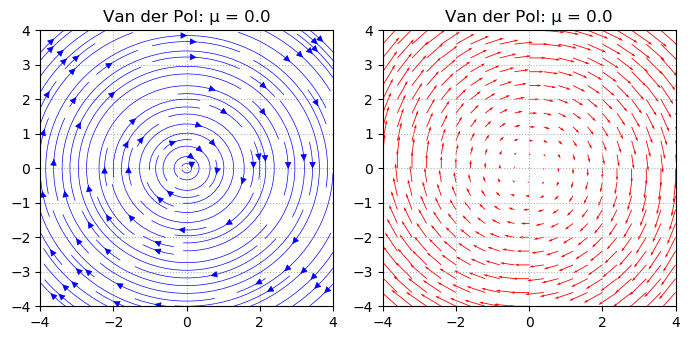

In [4]:
plot_Van_der_Pol(0.0, scale=10.0)

### $\mu$ が正の場合

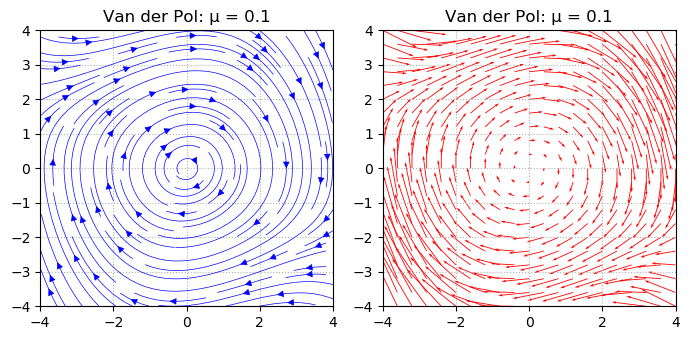

In [5]:
plot_Van_der_Pol(0.1)

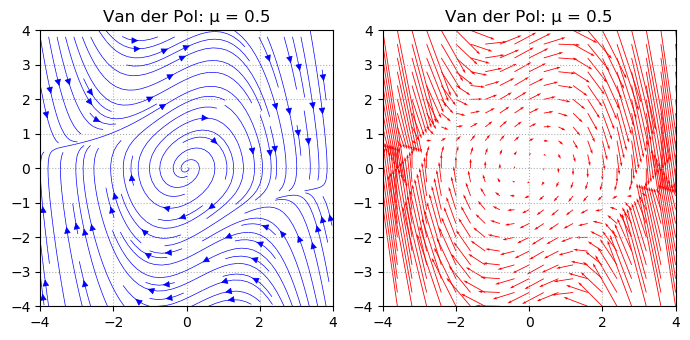

In [6]:
plot_Van_der_Pol(0.5)

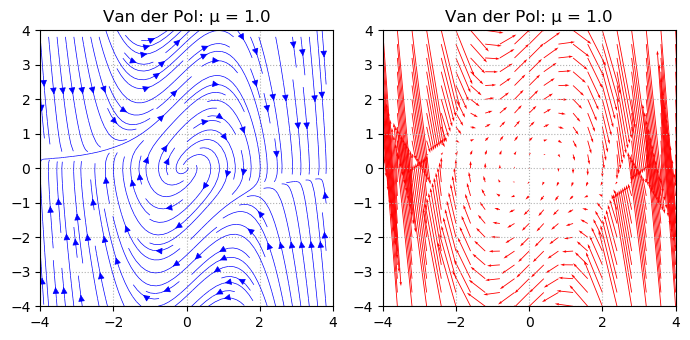

In [7]:
plot_Van_der_Pol(1.0)

### $\mu$ が負の場合

Van der Pol 方程式

$$
\ddot{x} - \mu(1-x^2)\dot{x} + x = 0.
$$

で時刻 $t$ が進む向きを逆転させると, すなわち, $t$ に $-t$ を代入すると, 

$$
\ddot{x} + \mu(1-x^2)\dot{x} + x = 0.
$$

の形になる. すなわち, 時間の向きを逆転させることと, パラメーター $\mu$ をその $-1$ 倍で置き換えることは等しい. 

以下の $\mu=0.2$ と $\mu=-0.2$ の場合のプロットを比較すると, 矢印の向きが逆になっていることがわかる.

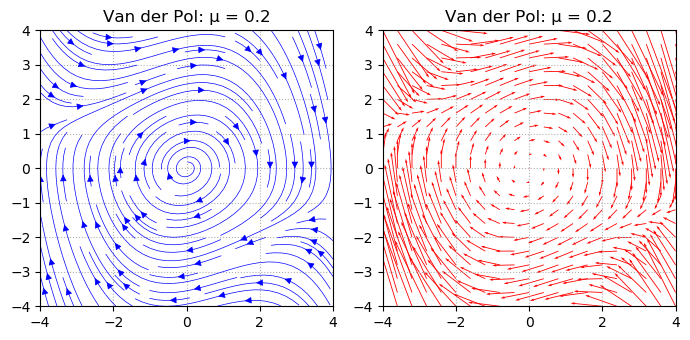

In [8]:
plot_Van_der_Pol(0.2)

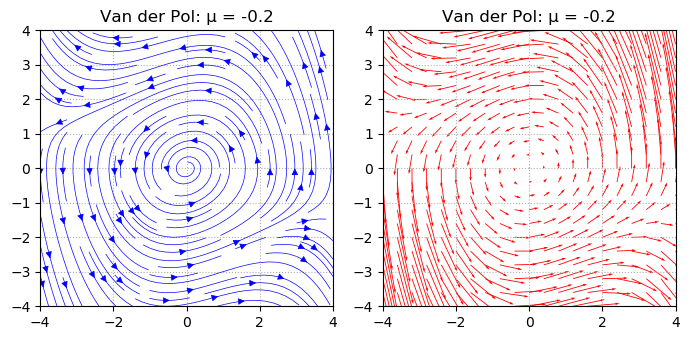

In [9]:
plot_Van_der_Pol(-0.2, sign=-1.0)

**注意:** 上のセルの `sign=-1.0` はプロットするときに縦軸($v$ 軸)の向きを反転してプロットすることを意味している.